In [1]:
import numpy as np
import pandas as pd
import zipfile
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Path to the zip file
zip_path = "archive.zip"

# Directory to extract the zip file
extract_dir = r"C:\Users\DELL\Documents\Hamoye\Team project\Project"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Get a list of all CSV files in the extracted directory
csv_files = [file for file in os.listdir(extract_dir) if file.endswith('.csv')]

# Combine the datasets
df = pd.concat([pd.read_csv(os.path.join(extract_dir, file)) for file in csv_files])

# Optional: Reset the index
df.reset_index(drop=True, inplace=True)

In [3]:
df.head()

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,7.8,CWE-78,LOCAL,LOW,HIGH
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-89,NETWORK,LOW,CRITICAL
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-918,NETWORK,LOW,CRITICAL
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-11,8.8,CWE-787,NETWORK,LOW,HIGH


## Information on the data frame

- cve_id: This column represents the unique identifier for each vulnerability entry. It is stored as string data.

- vendor_project: This column contains the name or identifier of the vendor or project associated with the vulnerability. It is stored as string data.

- product: This column denotes the specific product or software that is affected by the vulnerability. It is stored as string data.

- vulnerability_name: This column provides the name or description of the vulnerability itself. It is stored as string data.

- date_added: This column represents the date when the vulnerability was added or discovered. It is stored as a date data type.

- short_description: This column contains a brief summary or description of the vulnerability. It is stored as string data.

- required_action: This column specifies the recommended action or steps to be taken to address the vulnerability. It is stored as string data.

- due_date: This column denotes the deadline or due date for taking action to mitigate the vulnerability. It is stored as a date data type.

- notes: This column indicates whether there are any additional notes or comments associated with the vulnerability. It is stored as string data.

- grp: This column represents a grouping or categorization of vulnerabilities. It is stored as a numeric (float) data type.

- pub_date: This column denotes the date when the vulnerability was publicly disclosed or made known. It is stored as a date data type.

- cvss: This column contains the Common Vulnerability Scoring System (CVSS) score, which provides a standardized measure of vulnerability severity. It is stored as a numeric (float) data type.

- cwe: This column represents the Common Weakness Enumeration (CWE) ID associated with the vulnerability. It is stored as string data.

- vector: This column describes the vector or method of exploitation for the vulnerability. It is stored as string data.

- complexity: This column indicates the complexity level of exploiting the vulnerability. It is stored as string data.

- severity: This column represents the severity level assigned to the vulnerability. It is stored as string data.

From the dataset, I noticed that the 'cve_id' column had duplicate.
There are a few possible reasons why the 'cve_id' might be repeated across the datasets:
- The datasets were created from different sources, and the same vulnerability name was assigned a different cve_id by each source.
- The datasets were created at different times, and the same vulnerability name was assigned a new cve_id when it was patched.
- The datasets were created by different people, and some people made mistakes when entering the data.

In [4]:
# Group the data by vulnerability_name and collect unique cve_id values within each group
duplicate_vulnerabilities = df.groupby('vulnerability_name')['cve_id'].unique()

# Filter the duplicate vulnerabilities
duplicate_vulnerabilities = duplicate_vulnerabilities[duplicate_vulnerabilities.apply(lambda x: len(x) > 1)]

# Print the vulnerability_name and corresponding cve_id values with duplicates
if not duplicate_vulnerabilities.empty:
    print("Vulnerability names with different cve_id:")
    for vulnerability_name, cve_ids in duplicate_vulnerabilities.iteritems():
        print("Vulnerability Name:", vulnerability_name)
        print("CVE IDs:", cve_ids)
        print()
else:
    print("No vulnerability names with different cve_id found.")


Vulnerability names with different cve_id:
Vulnerability Name: Accellion FTA OS Command Injection Vulnerability
CVE IDs: ['CVE-2021-27104' 'CVE-2021-27102']

Vulnerability Name: Adobe Acrobat and Reader Use-After-Free Vulnerability
CVE IDs: ['CVE-2021-28550' 'CVE-2009-4324']

Vulnerability Name: Adobe ColdFusion Authentication Bypass Vulnerability
CVE IDs: ['CVE-2013-0632' 'CVE-2013-0625']

Vulnerability Name: Adobe ColdFusion Directory Traversal Vulnerability
CVE IDs: ['CVE-2013-0629' 'CVE-2010-2861']

Vulnerability Name: Adobe Flash Player Arbitrary Code Execution Vulnerability
CVE IDs: ['CVE-2016-4117' 'CVE-2016-1019' 'CVE-2015-7645' 'CVE-2012-1535']

Vulnerability Name: Adobe Flash Player Integer Overflow Vulnerability
CVE IDs: ['CVE-2015-8651' 'CVE-2012-5054']

Vulnerability Name: Adobe Flash Player Memory Corruption Vulnerability
CVE IDs: ['CVE-2015-3043' 'CVE-2012-2034' 'CVE-2012-0754' 'CVE-2010-1297']

Vulnerability Name: Adobe Flash Player Remote Code Execution Vulnerability
C

**Observation**
- vulnerability names were assigned a different cve_id by different source

In [5]:
# View the number of rows and number of columns
df.shape

(3984, 16)

In [6]:
# View the summary of the data
df.describe(include = 'all')

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
count,3984,3984,3979,3984,3984,3954,3984,3984,77,3984.000000,3106,2484.000000,3090,2484,2484,2484
unique,860,140,374,690,64,825,10,79,67,NaN,486,NaN,81,3,2,4
top,CVE-2021-27104,microsoft,Windows,Microsoft Win32k Privilege Escalation Vulnerab...,2021-11-03,"A vulnerability in Cisco Small Business RV160,...",Apply updates per vendor instructions.,2022-05-03,https://www.gigabyte.com/Support/Security/1801,NaN,2018-03-28,NaN,NVD-CWE-noinfo,NETWORK,LOW,HIGH
freq,5,1174,405,80,1435,25,3716,870,4,NaN,60,NaN,492,1822,2258,1382
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.417922,NaN,8.412440,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.401496,NaN,1.302686,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,3.100000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,7.800000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,NaN,8.800000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,9.800000,NaN,NaN,NaN,NaN


In [7]:
# A display of the columns, non-null count and the dtypes per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3984 entries, 0 to 3983
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cve_id              3984 non-null   object 
 1   vendor_project      3984 non-null   object 
 2   product             3979 non-null   object 
 3   vulnerability_name  3984 non-null   object 
 4   date_added          3984 non-null   object 
 5   short_description   3954 non-null   object 
 6   required_action     3984 non-null   object 
 7   due_date            3984 non-null   object 
 8   notes               77 non-null     object 
 9   grp                 3984 non-null   int64  
 10  pub_date            3106 non-null   object 
 11  cvss                2484 non-null   float64
 12  cwe                 3090 non-null   object 
 13  vector              2484 non-null   object 
 14  complexity          2484 non-null   object 
 15  severity            2484 non-null   object 
dtypes: flo

In [8]:
# A better view of the number of null entries per column
df.isnull().sum()

cve_id                   0
vendor_project           0
product                  5
vulnerability_name       0
date_added               0
short_description       30
required_action          0
due_date                 0
notes                 3907
grp                      0
pub_date               878
cvss                  1500
cwe                    894
vector                1500
complexity            1500
severity              1500
dtype: int64

### Dealing with the null entries

In [9]:
# Drop the "notes" column
df.drop('notes', axis=1, inplace=True)

Upon thorough examination of the data frame, I suspected that for rows with the same "cve_id," the corresponding values in other columns are identical, a check to know if that is true

In [12]:
# Group the data by cve_id and count the number of unique values in each column
grouped_df = df.groupby('cve_id').nunique()

# Check if all columns have the same number of unique values for each cve_id
identical = grouped_df.iloc[:, 1:].eq(grouped_df.iloc[:, 1:].count(axis=0)).all().all()

if identical:
    print("The suspicion holds true. Rows with the same 'cve_id' have identical values across other columns.")
else:
    print("The suspicion does not hold true. Rows with the same 'cve_id' have differing values across other columns.")

The suspicion does not hold true. Rows with the same 'cve_id' have differing values across other columns.


In [13]:
df.isnull().sum()

cve_id                   0
vendor_project           0
product                  5
vulnerability_name       0
date_added               0
short_description       30
required_action          0
due_date                 0
grp                      0
pub_date               878
cvss                  1500
cwe                    894
vector                1500
complexity            1500
severity              1500
dtype: int64

In [14]:
# group-wise imputation of missing values by replacing them with the first non-null value within each group
def impute_group(group):
    if group.notna().any().all():
        return group.fillna(group.dropna().iloc[0])
    else:
        return group

df1 = df.groupby('cve_id').apply(impute_group)

# Reset the index after grouping
df1.reset_index(drop=True, inplace=True)

In [15]:
df1.isnull().sum()

cve_id                  0
vendor_project          0
product                 5
vulnerability_name      0
date_added              0
short_description      30
required_action         0
due_date                0
grp                     0
pub_date              257
cvss                  870
cwe                   261
vector                870
complexity            870
severity              870
dtype: int64

- The groupby() function groups the data by cve_id.
- The nunique() function counts the number of unique values in each column of the grouped data.
- The eq() function checks if each column of the grouped data has the same number of unique values.
- The all() function checks if all the values in a Boolean array are True.
- The print() function prints the results to the console.
- The def function defines a function called impute_group().
- The impute_group() function imputes missing values in a group by replacing them with the first non-null value in the group.
- The apply() function applies the impute_group() function to each group of the data.
- The reset_index() function resets the index of the data after grouping.

In [16]:
# Remove missing values
df1_cleaned = df1.dropna()

In [17]:
df1_cleaned.isnull().sum()

cve_id                0
vendor_project        0
product               0
vulnerability_name    0
date_added            0
short_description     0
required_action       0
due_date              0
grp                   0
pub_date              0
cvss                  0
cwe                   0
vector                0
complexity            0
severity              0
dtype: int64

In [42]:
# Group by 'cve_id' and check if entries in other columns are not uniform throughout the group
non_uniform_groups = df1_cleaned.groupby('cve_id').transform(lambda x: x.nunique() > 1).any(axis=1)

# Get the rows with non-uniform 'cve_id' groups
non_uniform_rows = df1_cleaned[non_uniform_groups]

# Get the unique 'cve_id' groups where entries in other columns are not uniform
non_uniform_cve_groups = non_uniform_rows.groupby('cve_id').apply(lambda x: x.drop_duplicates()).reset_index(drop=True)

# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Print the non-uniform 'cve_id' groups
non_uniform_cve_groups


,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity,unique_vulnerability
0,CVE-2016-2388,sap,NetWeaver,SAP NetWeaver Information Disclorsure Vulnerability,2022-06-09,The Universal Worklist Configuration in SAP NetWeaver AS JAVA 7.4 allows remote attackers to obtain sensitive user information via a crafted HTTP request.,Apply updates per vendor instructions.,2022-06-30,38,2016-02-16,5.3,CWE-200,NETWORK,LOW,MEDIUM,CVE-2016-2388_sap_NetWeaver_SAP NetWeaver Information Disclorsure Vulnerability
1,CVE-2016-2388,sap,NetWeaver,SAP NetWeaver Information Disclosure Vulnerability,2022-06-09,The Universal Worklist Configuration in SAP NetWeaver AS JAVA 7.4 allows remote attackers to obtain sensitive user information via a crafted HTTP request.,Apply updates per vendor instructions.,2022-06-30,38,2016-02-16,5.3,CWE-200,NETWORK,LOW,MEDIUM,CVE-2016-2388_sap_NetWeaver_SAP NetWeaver Information Disclosure Vulnerability
2,CVE-2017-11292,adobe,Flash Player,Adobe Flash Player Type Confusion Vulnerability,2022-03-03,Adobe Flash Player contains a type confusion vulnerability which can allow for remote code execution.,The impacted product is end-of-life and should be disconnected if still in use.,2022-03-24,16,2017-10-22,8.8,CWE-129,NETWORK,LOW,HIGH,CVE-2017-11292_adobe_Flash Player_Adobe Flash Player Type Confusion Vulnerability
3,CVE-2017-11292,adobe,Flash Player,Adobe Flash Player Type Confusion Vulnerability,2022-03-03,Adobe Flash Player contains a type confusion vulnerability which can allow for remote code execution.,The impacted product is end-of-life and should be disconnected if still in use.,2022-03-24,16,2017-10-22,8.8,CWE-843,NETWORK,LOW,HIGH,CVE-2017-11292_adobe_Flash Player_Adobe Flash Player Type Confusion Vulnerability
4,CVE-2017-6862,netgear,Multiple Devices,NETGEAR Multiple Devices Buffer Overflow Vulnerability,2022-06-08,Multiple NETGEAR devices contain a buffer overflow vulnerability that allow for authentication bypass and remote code execution.,Apply updates per vendor instructions.,2022-06-22,37,2017-05-26,9.8,CWE-119,NETWORK,LOW,CRITICAL,CVE-2017-6862_netgear_Multiple Devices_NETGEAR Multiple Devices Buffer Overflow Vulnerability
5,CVE-2017-6862,netgear,Multiple Devices,NETGEAR Multiple Devices Buffer Overflow Vulnerability,2022-06-08,Multiple NETGEAR devices contain a buffer overflow vulnerability that allows for authentication bypass and remote code execution.,Apply updates per vendor instructions.,2022-06-22,37,2017-05-26,9.8,CWE-119,NETWORK,LOW,CRITICAL,CVE-2017-6862_netgear_Multiple Devices_NETGEAR Multiple Devices Buffer Overflow Vulnerability
6,CVE-2018-17463,google,Chromium V8 Engine,Google Chromium V8 Remote Code Execution Vulnerability,2022-06-08,Google Chromium V8 contains an unspecified vulnerability which allows for remote code execution.,Apply updates per vendor instructions.,2022-06-22,37,2018-11-14,8.8,NVD-CWE-noinfo,NETWORK,LOW,HIGH,CVE-2018-17463_google_Chromium V8 Engine_Google Chromium V8 Remote Code Execution Vulnerability
7,CVE-2018-17463,google,Chromium V8 Engine,Google Chromium V8 Remote Code Execution Vulnerability,2022-06-08,Google Chromium V8 Engine contains an unspecified vulnerability which allows for remote code execution.,Apply updates per vendor instructions.,2022-06-22,37,2018-11-14,8.8,NVD-CWE-noinfo,NETWORK,LOW,HIGH,CVE-2018-17463_google_Chromium V8 Engine_Google Chromium V8 Remote Code Execution Vulnerability
8,CVE-2018-17480,google,Chromium V8 Engine,Google Chromium V8 Out-of-Bounds Write Vulnerability,2022-06-08,Google Chromium V8 contains an out-of-bounds write vulnerability which allows a remote attacker to execute code inside a sandbox.,Apply updates per vendor instructions.,2022-06-22,37,2018-12-11,8.8,CWE-787,NETWORK,LOW,HIGH,CVE-2018-17480_google_Chromium V8 Engine_Google Chromium V8 Out-of-Bounds Write Vulnerability
9,CVE-2018-17480,google,Chromium V8 Engine,Google Chromium V8 Out-

In [28]:
unique_cve_ids = non_uniform_cve_groups['cve_id'].unique()
print(unique_cve_ids)

['CVE-2016-2388' 'CVE-2017-11292' 'CVE-2017-6862' 'CVE-2018-17463'
 'CVE-2018-17480' 'CVE-2019-5825' 'CVE-2019-7194' 'CVE-2019-7195'
 'CVE-2019-9670' 'CVE-2020-2021' 'CVE-2020-5847' 'CVE-2021-1647'
 'CVE-2021-22986' 'CVE-2021-26411' 'CVE-2021-28310' 'CVE-2021-28664'
 'CVE-2021-30657' 'CVE-2021-30665' 'CVE-2021-31956' 'CVE-2021-31979'
 'CVE-2021-33739' 'CVE-2021-33771' 'CVE-2021-36741' 'CVE-2021-36742'
 'CVE-2021-38163']


In [29]:
non_uniform_cve_groups.shape

(50, 15)

In [30]:
df1_cleaned.shape

(3086, 15)

In [31]:
df1_cleaned.dtypes

cve_id                 object
vendor_project         object
product                object
vulnerability_name     object
date_added             object
short_description      object
required_action        object
due_date               object
grp                     int64
pub_date               object
cvss                  float64
cwe                    object
vector                 object
complexity             object
severity               object
dtype: object

## EDA

### Identify unique vulnerabilities

In [32]:
# Create a new column combining relevant columns to identify unique vulnerabilities
df1_cleaned['unique_vulnerability'] = df1_cleaned['cve_id'].astype(str) + '_' + df1_cleaned['vendor_project'] + '_' + df1_cleaned['product'] + '_' + df1_cleaned['vulnerability_name']

# Identify unique vulnerabilities
unique_vulnerabilities = df1_cleaned['unique_vulnerability'].unique()

# Print the number of unique vulnerabilities
print("Number of unique vulnerabilities:", len(unique_vulnerabilities))


Number of unique vulnerabilities: 628


C:\Users\DELL\AppData\Local\Temp/ipykernel_6704/2814414741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned['unique_vulnerability'] = df1_cleaned['cve_id'].astype(str) + '_' + df1_cleaned['vendor_project'] + '_' + df1_cleaned['product'] + '_' + df1_cleaned['vulnerability_name']


#### Vulnerabilities by severity level

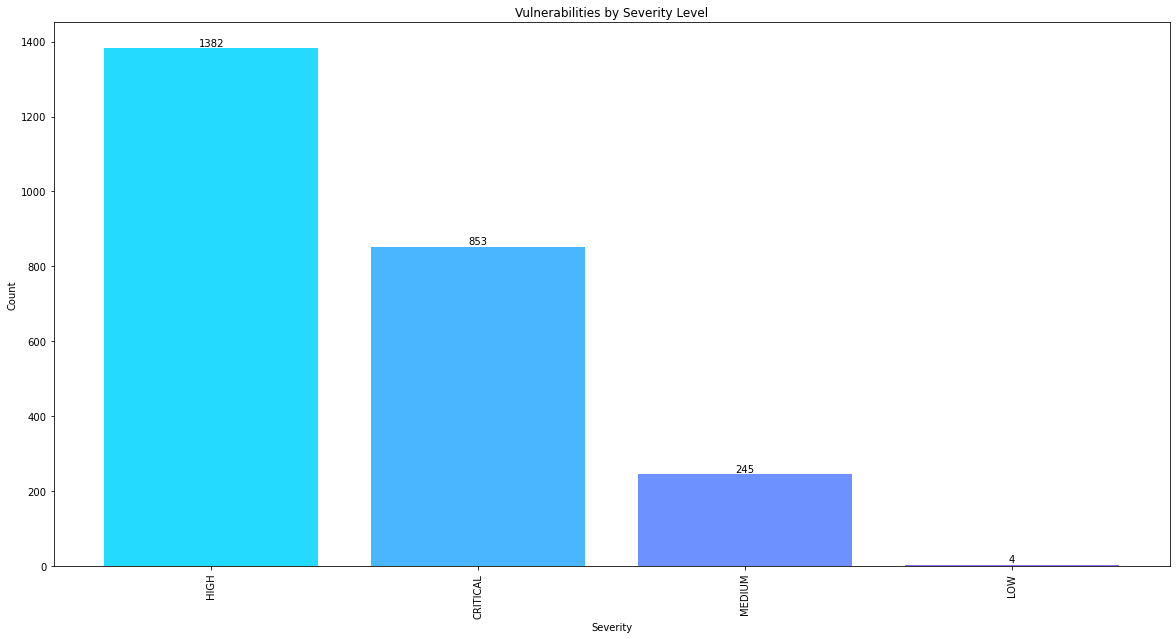

In [33]:
# Set a cool color palette
colors = sns.color_palette("cool")

# Count vulnerabilities by severity level
severity_counts = df['severity'].value_counts()

# Create a bar plot with a larger figure size
plt.figure(figsize=(20, 10))
bars = plt.bar(severity_counts.index, severity_counts.values, color=colors)

# Add count labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.xlabel('Severity')
plt.ylabel('Count')
plt.title('Vulnerabilities by Severity Level')
plt.xticks(rotation=90)
plt.show()


### Analyzing the datasets to identify patterns or trends in the occurrence and severity of vulnerabilities
Accessing changes in the frequency or distribution of vulnerabilities across the different dates, with the aim to identify areas of increased or decreased risk over time.

In [34]:
# Convert date columns to datetime data type
date_columns = ['date_added', 'due_date', 'pub_date']
df1_cleaned[date_columns] = df1_cleaned[date_columns].apply(pd.to_datetime)

# Group vulnerabilities by date and count the occurrences
vulnerability_counts = df1_cleaned.groupby('date_added').size()

C:\Users\DELL\AppData\Local\Temp/ipykernel_6704/3034722017.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned[date_columns] = df1_cleaned[date_columns].apply(pd.to_datetime)


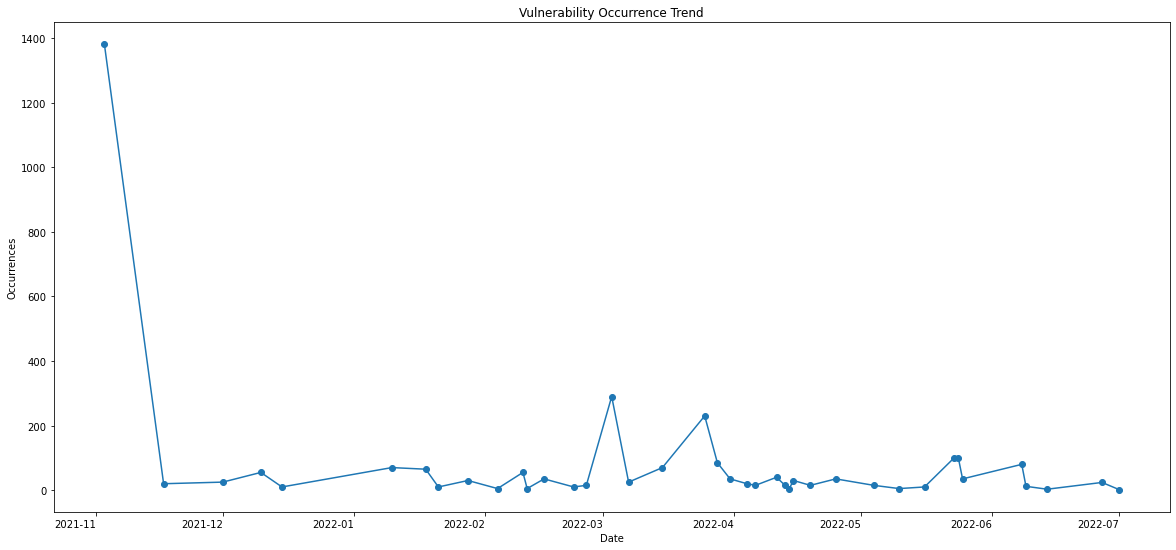

In [35]:
# Plot the vulnerability occurrence trend
plt.figure(figsize=(20, 10))
vulnerability_counts.plot(kind='line', marker='o')
plt.title('Vulnerability Occurrence Trend')
plt.xlabel('Date')
plt.ylabel('Occurrences')
plt.xticks(rotation=0)
plt.show()